# ironKaggel

## 1. Importing libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('csv/sales.csv')
sales.head(1)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422


## 2. Data wrangling.

### 2.1 Cleaning the data.

In [3]:
# We will remove the index. It is not necesary to calculete the model.
sales = sales.drop(['Unnamed: 0'],axis=1)

# To make date to numeric.
sales['date'] = pd.DatetimeIndex(sales['date']) 
sales['date'] = pd.to_numeric(sales['date'], errors='coerce')

# To make satate holiday numeric
sales['state_holiday'] = sales['state_holiday'].map({'0':0,'a': 1, 'b': 1,'c':1})

<AxesSubplot:>

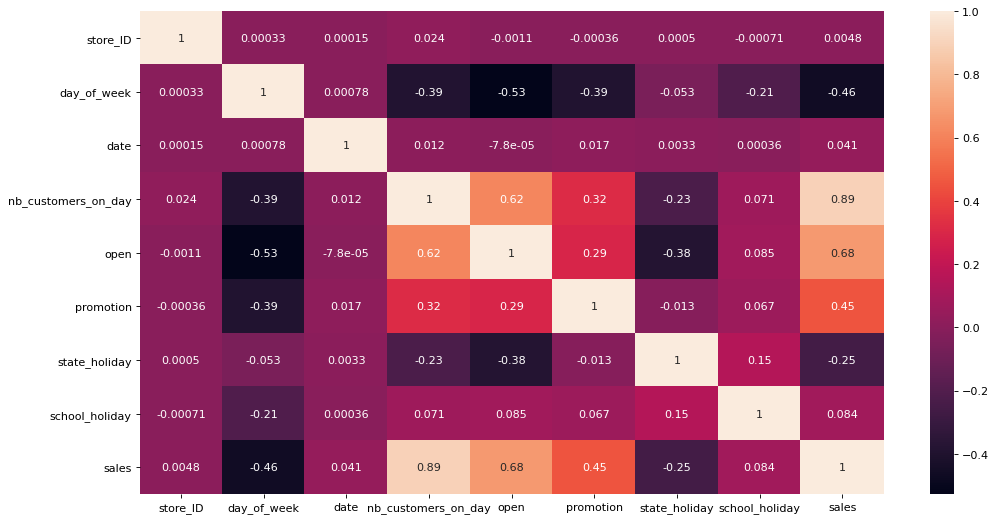

In [4]:
# Correlation matrix
correlations_matrix = sales.corr()
plt.figure(figsize=(15,8), dpi=80) 
display(sns.heatmap(correlations_matrix, annot=True))
plt.show()

### 2.2 Spliting the target and the features.

In [4]:
y = sales['sales']
X = sales.drop(['sales'], axis = 1)

In [5]:
# Creating the train and the test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3 Prediction models.

### 3.1 Diferent models.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth = None,
                                criterion = 'mse',
                                min_samples_split = 10,
                                min_samples_leaf = 10)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(max_depth = None,
                               criterion = 'mse',
                               min_samples_leaf = 2,
                               min_samples_split = 2)

model_pipeline = [model1, model2, model3, model4]

train_score = []
test_score = []
cross_scores = []
mse = []
rmse = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    cross_scores.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))
    mse_calculated = mean_squared_error(y_test,model.predict(X_test))
    mse.append(mse_calculated)
    rmse.append(math.sqrt(mse_calculated))

In [7]:
summary = {'Train Score':train_score,
           'Test Score':test_score,
           'Cross Score':cross_scores,
            'mse':mse,
          'rmse':rmse,}
summary = pd.DataFrame(summary).T
summary.columns = 'DecisionTree', 'LinearRegression', 'KNeighborsRegressor','RandomForest'

In [8]:
summary

,DecisionTree,LinearRegression,KNeighborsRegressor,RandomForest
Train Score,9.480421e-01,8.020067e-01,9.043829e-01,0.985151
Test Score,9.167924e-01,8.019905e-01,8.535796e-01,0.944545
Cross Score,9.102756e-01,8.019899e-01,8.522573e-01,0.939696
mse,1.232613e+06,2.933256e+06,2.169030e+06,821500.354272
rmse,1.110231e+03,1.712675e+03,1.472763e+03,906.366567


### 3.2 Parameters optimitation.

In [9]:
from sklearn.model_selection import RandomizedSearchCV


max_depth_choices= [3,10,None]
criterion_choices = ['mse']
min_samples_split_choices = [2,10]
min_samples_leaf_choices = [2,10]   

random_grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [14]:
# Parameters optimitation for Decision Tree Regressor
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = random_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 10, None],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [15]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [10]:
# Parameters optimitation for Random Forest Regressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = random_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 10, None],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [11]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

## 4. Predicting results.

### 4.1 Importing and date wraglin with the new file.

In [9]:
sales_validation = pd.read_csv('csv/validation_for_students.csv')

In [10]:
sales_validation.head(3)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0


In [11]:
# We will remove the index. It is not necesary to calculete the model.
X = sales_validation.drop(['index'],axis=1)

In [12]:
X['date'] = list(map(lambda x: x.replace('/','-'),X['date']))

In [13]:
# To make date to numeric.
X['date'] = pd.DatetimeIndex(X['date']) 
X['date'] = pd.to_numeric(X['date'], errors='coerce')

In [14]:
# To make satate holiday numeric
X['state_holiday'] = X['state_holiday'].map({'0':0,'a': 1, 'b': 1,'c':1})

In [15]:
predicted_sales1 = pd.Series(model1.predict(X),name='predicted_sales')

In [16]:
predicted_sales2 = pd.Series(model2.predict(X),name='predicted_sales')

In [17]:
predicted_sales3 = pd.Series(model3.predict(X),name='predicted_sales')

In [18]:
predicted_sales4 = pd.Series(model4.predict(X),name='predicted_sales')

### 4.2 Predicting the sales.

In [19]:
resultsTree = pd.concat([sales_validation, predicted_sales1],axis=1)
final_resultsTree = resultsTree[['index','predicted_sales']].sort_values('index')

In [20]:
resultsLM = pd.concat([sales_validation, predicted_sales2],axis=1)
final_resultsLM = resultsLM[['index','predicted_sales']].sort_values('index')

In [21]:
resultsKNN = pd.concat([sales_validation, predicted_sales3],axis=1)
final_resultsKNN = resultsKNN[['index','predicted_sales']].sort_values('index')

In [22]:
resultsKNN = pd.concat([sales_validation, predicted_sales4],axis=1)
final_resultsRandom = resultsKNN[['index','predicted_sales']].sort_values('index')

## 5. Exporting the files.

In [23]:
final_resultsTree.to_excel('Tree_predictions.xlsx',index = False)

In [24]:
final_resultsLM.to_excel('LM_predictions.xlsx',index = False)

In [25]:
final_resultsKNN.to_excel('KNN_predictions.xlsx',index = False)

In [27]:
final_resultsRandom.to_excel('Random_predictions.xlsx',index = False)